In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading the data

In [23]:
file_path = 'C:/Users/paula/OneDrive/Desktop/databases/Top10VideoGameStocks.csv'

In [25]:
df = pd.read_csv(file_path)

In [27]:
#Exploration

In [29]:
print("First 5 rows of the data")
print(df.head())

First 5 rows of the data
         Date                         Company Ticker Symbol Currency  \
0  2000-01-01  Sony Interactive Entertainment          SONY      JPY   
1  2000-02-01  Sony Interactive Entertainment          SONY      JPY   
2  2000-03-01  Sony Interactive Entertainment          SONY      JPY   
3  2000-04-01  Sony Interactive Entertainment          SONY      JPY   
4  2000-05-01  Sony Interactive Entertainment          SONY      JPY   

        Open       High        Low      Close  Adj Close     Volume  
0  28.525000  29.168751  20.850000  25.299999  14.535083  147012000  
1  25.293751  31.475000  25.000000  31.350000  18.010864   67437000  
2  30.100000  31.299999  21.700001  28.012501  16.093437  112674000  
3  28.250000  28.250000  22.312500  22.562500  12.974537   74071000  
4  22.700001  23.481251  17.750000  18.237499  10.487453   65035500  


In [31]:
print("\nData Summary :")
print(df.describe())


Data Summary :
              Open         High          Low        Close    Adj Close  \
count  2209.000000  2209.000000  2209.000000  2209.000000  2209.000000   
mean     56.082332    60.403246    52.123886    56.452762    54.255817   
std      88.552277    95.086684    82.698684    88.816897    87.529546   
min       0.032000     0.032000     0.025500     0.032000     0.025868   
25%       8.374000     9.225000     7.520000     8.380000     7.123526   
50%      22.362000    24.500000    20.070000    22.379999    18.641869   
75%      57.276001    61.731998    53.959999    57.459999    55.368843   
max     643.455811   714.899658   610.729919   628.245178   613.602234   

             Volume  
count  2.209000e+03  
mean   2.677228e+08  
std    4.027909e+08  
min    0.000000e+00  
25%    3.879940e+07  
50%    8.711250e+07  
75%    3.528646e+08  
max    3.044579e+09  


In [33]:
#Data Cleaning

In [35]:
#Converting the 'Date' to datetime

In [37]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [39]:
# Checking and handling missing values

In [41]:
missing_summary = df.isnull().sum()
print("\nMissing Values Summary:")
print(missing_summary)


Missing Values Summary:
Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64


In [43]:
# Converting numerical colums to proper types

In [45]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [47]:
# Removing the duplicates

In [49]:
df.drop_duplicates(inplace=True)

In [51]:
# Claning check

In [55]:
print("\nCleaning Data Info:")
print(df.info())


Cleaning Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2209 non-null   datetime64[ns]
 1   Company        2209 non-null   object        
 2   Ticker Symbol  2209 non-null   object        
 3   Currency       2209 non-null   object        
 4   Open           2209 non-null   float64       
 5   High           2209 non-null   float64       
 6   Low            2209 non-null   float64       
 7   Close          2209 non-null   float64       
 8   Adj Close      2209 non-null   float64       
 9   Volume         2209 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 172.7+ KB
None


In [57]:
# Add derived columns

In [59]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [61]:
# Handling Currency Differences
# Grouping by Currency to calculate average prices

In [69]:
currency_comparison = df.groupby(['Currency', 'Company'])['Close'].mean().unstack()
print("\nCurrency-based Comparison of Companies:")
print(currency_comparison)


Currency-based Comparison of Companies:
Company   Electronic Arts  Embracer Group  Microsoft Gaming  NetEase Games  \
Currency                                                                     
HKD                   NaN             NaN               NaN            NaN   
JPY                   NaN             NaN               NaN            NaN   
SEK                   NaN       47.039273               NaN            NaN   
USD             63.792135             NaN         90.833884      31.033982   

Company   Nintendo   Playtika  Roblox Corporation  \
Currency                                            
HKD            NaN        NaN                 NaN   
JPY            NaN        NaN                 NaN   
SEK            NaN        NaN                 NaN   
USD       6.697284  14.085111           49.786745   

Company   Sony Interactive Entertainment  Take-Two Interactive  \
Currency                                                         
HKD                                  Na

In [71]:
# Exploration and Analysis

In [76]:
# 1. Summary Statistics by Company

In [78]:
summary_stats = df.groupby('Company')[['Open', 'High', 'Low', 'Close', 'Volume']].describe()
print("\nSummary Statistics by Company:")
print(summary_stats)


Summary Statistics by Company:
                                    Open                                     \
                                   count        mean         std        min   
Company                                                                       
Electronic Arts                    298.0   63.376126   42.968200  11.500000   
Embracer Group                      95.0   46.903330   32.406738   5.033333   
Microsoft Gaming                   298.0   89.801136  106.044263  15.960000   
NetEase Games                      292.0   30.894441   35.709190   0.032000   
Nintendo                           298.0    6.665512    3.861494   1.800000   
Playtika                            45.0   14.616889    7.628007   7.060000   
Roblox Corporation                  43.0   50.152326   23.267670  28.620001   
Sony Interactive Entertainment     298.0    9.836865    5.721882   1.944000   
Take-Two Interactive               298.0   53.307638   56.165831   4.726667   
Tencent Interactive 

In [80]:
# 2. Identify Top and Lowest Performers by Date

In [86]:
top_closing_prices = df.loc[df.groupby('Date')['Close'].idxmax()][['Date', 'Company', 'Close']]
lowest_closing_prices = df.loc[df.groupby('Date')['Close'].idxmin()][['Date', 'Company', 'Close']]

print("\nTop Performers by Date:")
print(top_closing_prices)

print("\nLowest Performers by Date:")
print(lowest_closing_prices)


Top Performers by Date:
          Date                            Company       Close
542 2000-01-01                   Microsoft Gaming   48.937500
543 2000-02-01                   Microsoft Gaming   44.687500
544 2000-03-01                   Microsoft Gaming   53.125000
545 2000-04-01                   Microsoft Gaming   34.875000
546 2000-05-01                   Microsoft Gaming   31.281250
..         ...                                ...         ...
835 2024-06-01                   Microsoft Gaming  446.950012
836 2024-07-01                   Microsoft Gaming  418.350006
837 2024-08-01                   Microsoft Gaming  417.140015
540 2024-09-01  Tencent Interactive Entertainment  444.600006
839 2024-10-01                   Microsoft Gaming  406.350006

[298 rows x 3 columns]

Lowest Performers by Date:
           Date   Company  Close
840  2000-01-01  Nintendo  4.450
841  2000-02-01  Nintendo  5.400
842  2000-03-01  Nintendo  4.400
843  2000-04-01  Nintendo  4.150
844  2000-05-0

In [88]:
# 3. Seasonal Trends (Monthly)

In [90]:
monthly_trends = df.groupby(['Month', 'Company'])['Close'].mean().unstack()
print("\nMonthly Trends in Stock Prices:")
print(monthly_trends)


Monthly Trends in Stock Prices:
Company  Electronic Arts  Embracer Group  Microsoft Gaming  NetEase Games  \
Month                                                                       
1              61.560550       43.346249         86.662550      31.496354   
2              60.881600       46.757500         86.039501      30.824328   
3              61.489274       48.156874         88.962950      30.685349   
4              61.691600       49.952917         89.332799      31.339791   
5              65.360750       50.298542         90.675850      32.045855   
6              66.034376       48.549791         94.333200      33.240500   
7              67.586775       49.545208         95.033250      32.087545   
8              67.418176       48.335208         95.799251      30.674030   
9              65.992900       46.177083         93.109650      30.313675   
10             65.063600       43.128249         96.257499      30.097780   
11             60.739739       46.728095   

In [92]:
# Identify best and worst performing months

In [94]:
best_month = df.groupby(['Company', 'Month'])['Close'].mean().groupby('Company').idxmax()
worst_month = df.groupby(['Company', 'Month'])['Close'].mean().groupby('Company').idxmin()

print("\nBest Performing Months for Each Company:")
print(best_month)

print("\nWorst Performing Months for Each Company:")
print(worst_month)


Best Performing Months for Each Company:
Company
Electronic Arts                                        (Electronic Arts, 7)
Embracer Group                                          (Embracer Group, 5)
Microsoft Gaming                                     (Microsoft Gaming, 10)
NetEase Games                                            (NetEase Games, 6)
Nintendo                                                      (Nintendo, 8)
Playtika                                                      (Playtika, 2)
Roblox Corporation                                 (Roblox Corporation, 11)
Sony Interactive Entertainment          (Sony Interactive Entertainment, 2)
Take-Two Interactive                              (Take-Two Interactive, 8)
Tencent Interactive Entertainment    (Tencent Interactive Entertainment, 6)
Name: Close, dtype: object

Worst Performing Months for Each Company:
Company
Electronic Arts                                        (Electronic Arts, 11)
Embracer Group                     

In [96]:
# 4. Outlier Detection (IQR Method)

In [98]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Close'] < Q1 - 1.5 * IQR) | (df['Close'] > Q3 + 1.5 * IQR)]

print("\nPotential Outliers in Closing Prices:")
print(outliers)


Potential Outliers in Closing Prices:
           Date                            Company Ticker Symbol Currency  \
426  2015-03-01  Tencent Interactive Entertainment       0700.HK      HKD   
427  2015-04-01  Tencent Interactive Entertainment       0700.HK      HKD   
428  2015-05-01  Tencent Interactive Entertainment       0700.HK      HKD   
429  2015-06-01  Tencent Interactive Entertainment       0700.HK      HKD   
430  2015-07-01  Tencent Interactive Entertainment       0700.HK      HKD   
...         ...                                ...           ...      ...   
2021 2024-06-01               Take-Two Interactive          TTWO      USD   
2022 2024-07-01               Take-Two Interactive          TTWO      USD   
2023 2024-08-01               Take-Two Interactive          TTWO      USD   
2024 2024-09-01               Take-Two Interactive          TTWO      USD   
2025 2024-10-01               Take-Two Interactive          TTWO      USD   

            Open        High        

In [100]:
# 5. Correlation Analysis

In [102]:
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.997412  0.996968  0.994741   0.994253  0.134906
High       0.997412  1.000000  0.997093  0.997856   0.997366  0.135314
Low        0.996968  0.997093  1.000000  0.997689   0.997150  0.132562
Close      0.994741  0.997856  0.997689  1.000000   0.999496  0.133762
Adj Close  0.994253  0.997366  0.997150  0.999496   1.000000  0.112250
Volume     0.134906  0.135314  0.132562  0.133762   0.112250  1.000000


In [104]:
# Plot the correlation matrix

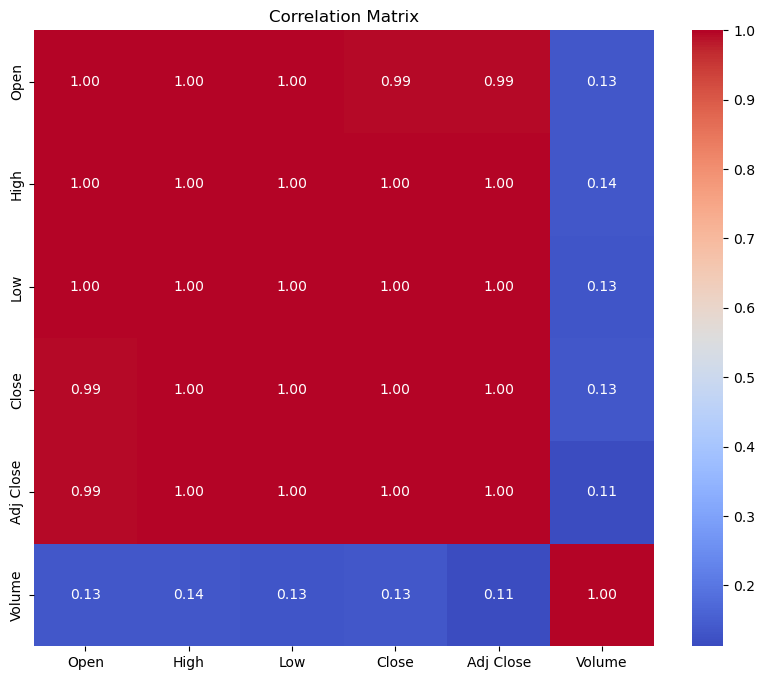

In [106]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

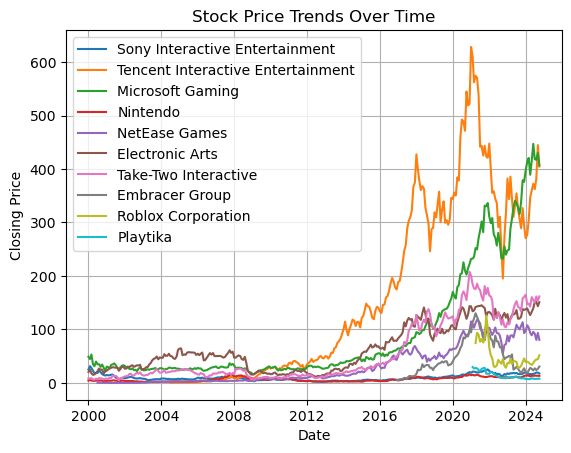

In [110]:
# 6. Trends Over Timeplt.figure(figsize=(12, 6))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

In [114]:
# 7. Volume Trends

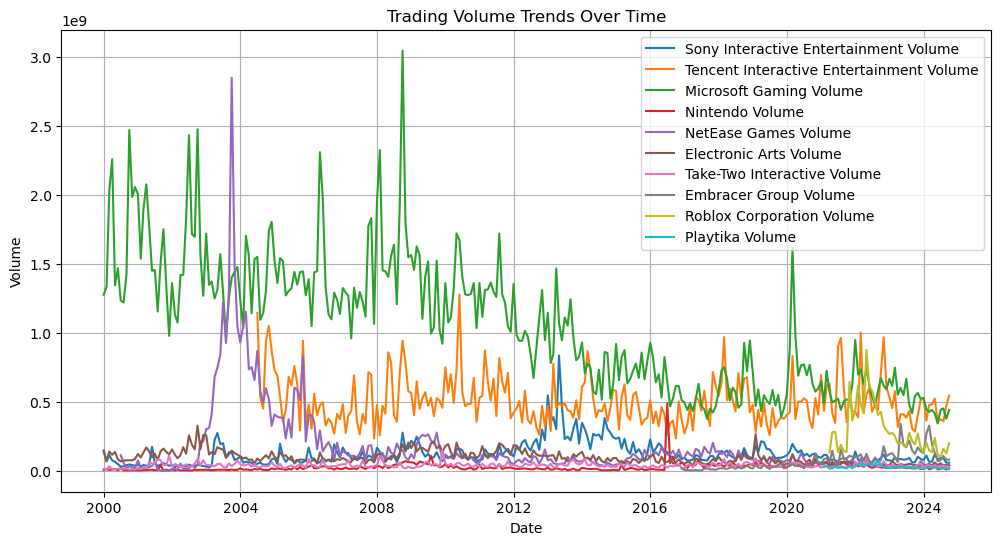

In [116]:
plt.figure(figsize=(12, 6))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volume'], label=f'{company} Volume')
plt.title('Trading Volume Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()